# Customer Segmentation

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings;
warnings.filterwarnings('ignore')

### Loading Data

In [2]:
df = pd.read_csv("transaction_data.csv")
df.head() 

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
0,278166,6355745,Sat Feb 02 12:50:00 IST 2019,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom
1,337701,6283376,Wed Dec 26 09:06:00 IST 2018,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom
2,267099,6385599,Fri Feb 15 09:45:00 IST 2019,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France
3,380478,6044973,Fri Jun 22 07:14:00 IST 2018,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom
4,-1,6143225,Mon Sep 10 11:58:00 IST 2018,1733592,WASHROOM METAL SIGN,3,3.40,United Kingdom


In [3]:
df.shape

(1083818, 8)

### Cleaning Data

#### Removing Unknown Values
Here, the cells containing negative numbers are taken as unknown.

In [4]:
df = df[df['NumberOfItemsPurchased'] > 0]

In [5]:
df.shape

(1062570, 8)

In [6]:
df = df[df['CostPerItem'] > 0]

In [7]:
df.shape

(1060208, 8)

In [8]:
df = df[df['UserId'] > 0]

In [9]:
df.shape

(795768, 8)

#### Collecting Useful Columns of Data
As we don't need all the columns we specify what we want.

In [10]:
df = df[['UserId', 'NumberOfItemsPurchased', 'CostPerItem', 'Country']]

In [11]:
df.describe(include ='all')

,UserId,NumberOfItemsPurchased,CostPerItem,Country
count,795768.000000,795768.000000,7.957680e+05,795768
unique,NaN,NaN,NaN,37
top,NaN,NaN,NaN,United Kingdom
freq,NaN,NaN,NaN,708642
mean,321182.892504,38.964713,8.569409e+00,NaN
std,35975.950165,537.994987,2.689349e+03,NaN
min,259266.000000,3.000000,1.000000e-02,NaN
25%,293349.000000,6.000000,1.730000e+00,NaN
50%,318339.000000,18.000000,2.700000e+00,NaN
75%,352695.000000,36.000000,5.180000e+00,NaN


## Segmentation

### Geographic Segmentation

In [12]:
df_country = df[['UserId', 'Country']]
df_country.head()

,UserId,Country
0,278166,United Kingdom
1,337701,United Kingdom
2,267099,France
3,380478,United Kingdom
5,285957,United Kingdom


In [13]:
df_country.shape

(795768, 2)

In [14]:
df_country = pd.DataFrame(df_country.groupby(['UserId'], as_index = False)['Country'].max())

In [15]:
df_country.head()

,UserId,Country
0,259266,United Kingdom
1,259287,Iceland
2,259308,Finland
3,259329,Italy
4,259350,Norway


In [16]:
df_country["Country"] = df_country["Country"].astype('category')

In [17]:
df_country["Segment_Number"] = df_country["Country"].cat.codes

In [18]:
df_country.head()

,UserId,Country,Segment_Number
0,259266,United Kingdom,35
1,259287,Iceland,16
2,259308,Finland,12
3,259329,Italy,18
4,259350,Norway,24


In [19]:
df_geographical_segmentation = df_country[['UserId', 'Segment_Number']]

In [20]:
df_geographical_segmentation.head()

,UserId,Segment_Number
0,259266,35
1,259287,16
2,259308,12
3,259329,18
4,259350,24


### Behavioral Segmentation

In [22]:
df_cpi_noi = df[['UserId', 'NumberOfItemsPurchased', 'CostPerItem']]
df_cpi_noi.head()

,UserId,NumberOfItemsPurchased,CostPerItem
0,278166,6,11.73
1,337701,3,3.52
2,267099,72,0.90
3,380478,3,1.73
5,285957,12,3.52


In [23]:
df_cpi_noi.describe().astype('int64')

,UserId,NumberOfItemsPurchased,CostPerItem
count,795768,795768,795768
mean,321182,38,8
std,35975,537,2689
min,259266,3,0
25%,293349,6,1
50%,318339,18,2
75%,352695,36,5
max,384027,242985,1696285


In [24]:
df_1 = pd.DataFrame(df_cpi_noi.groupby(['UserId'], as_index = True)['NumberOfItemsPurchased', 'CostPerItem'].mean())

In [25]:
df_1.head()

,NumberOfItemsPurchased,CostPerItem
UserId,,
259266,222645.000000,1.440000
259287,40.516484,3.654011
259308,226.548387,7.960000
259329,25.931507,11.444384
259350,34.764706,5.305294


In [26]:
df_1.shape

(4338, 2)

In [27]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df_1))
print(z.astype('float64'))

[[6.16388071e+01 1.53682942e-02]
 [2.62279345e-02 1.52823184e-02]
 [2.53059056e-02 1.51151055e-02]
 ...
 [3.03184888e-02 1.51453950e-02]
 [3.59159737e-02 1.53374639e-02]
 [1.86224716e-02 1.53440072e-02]]


### Removing Outliers
As the describe function shows a huge difference between 75 percentile and max, it indicates the presence of outliers.

In [28]:
threshold = 0.05
print(np.where(z > 0.05))

(array([   0,   55,  167,  332,  361,  381,  414,  427,  431,  435,  453,
        519,  571,  597,  662,  696,  769,  991,  996, 1037, 1067, 1076,
       1108, 1186, 1293, 1308, 1359, 1371, 1634, 1660, 1662, 1664, 1819,
       1860, 2029, 2087, 2168, 2221, 2233, 2429, 2502, 2505, 2517, 2536,
       2570, 2678, 2688, 2702, 2711, 2816, 2902, 2921, 2957, 3008, 3052,
       3071, 3156, 3167, 3176, 3186, 3216, 3230, 3325, 3360, 3403, 3430,
       3599, 3621, 3628, 3648, 3653, 3675, 3684, 3693, 3701, 3723, 3728,
       3803, 3926, 3953, 4013, 4021, 4055, 4087, 4088, 4092, 4093, 4185,
       4188, 4191, 4201, 4224, 4288, 4314], dtype=int64), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64))


In [29]:
print(z[1037][1])

65.85579265303753


In [30]:
df_2 = df_1[(z < 0.05).all(axis=1)]

In [31]:
df_2.head()

,NumberOfItemsPurchased,CostPerItem
UserId,,
259287,40.516484,3.654011
259308,226.548387,7.960000
259329,25.931507,11.444384
259350,34.764706,5.305294
259392,18.917647,21.990235


In [32]:
df_2.shape

(4244, 2)

### KMeans Clustering

In [33]:
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
import seaborn as sns; sns.set()

In [34]:
from sklearn.preprocessing import StandardScaler
X = df_2.values[:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 0.05655491, -0.09325611],
       [ 4.88290395,  0.13941902],
       [-0.32183282,  0.32769851],
       ...,
       [-0.32654177,  0.09727154],
       [-0.85076849, -0.16999059],
       [ 0.76883675, -0.17909553]])

### Using Elbow Method to find best 'k'

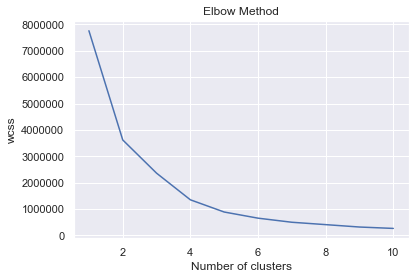

In [35]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

This indicates 5 will be the optimum value of "k".

In [36]:
# Initializing KMeans
clusterNum = 5
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[0 1 4 ... 4 4 0]


In [37]:
df_2["KMeans_Segment_Number"] = labels
df_2.head(5)

,NumberOfItemsPurchased,CostPerItem,KMeans_Segment_Number
UserId,,,
259287,40.516484,3.654011,0
259308,226.548387,7.960000,1
259329,25.931507,11.444384,4
259350,34.764706,5.305294,0
259392,18.917647,21.990235,4


In [38]:
df_2.KMeans_Segment_Number.value_counts()

4    2250
0    1593
3     294
1     103
2       4
Name: KMeans_Segment_Number, dtype: int64

In [39]:
km5 = KMeans(n_clusters=5,init='k-means++', max_iter=300, n_init=10, random_state=0)
X = df_2.values[:]
y_means = km5.fit_predict(X)

### Visualizing the segmentation

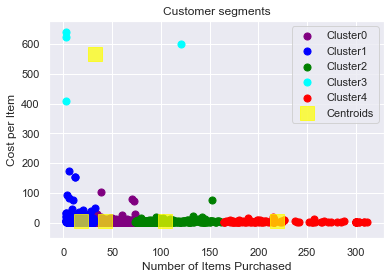

In [40]:
# Customizing
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=50, c='purple',label='Cluster0')
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=50, c='blue',label='Cluster1')
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=50, c='green',label='Cluster2')
plt.scatter(X[y_means==3,0],X[y_means==3,1],s=50, c='cyan',label='Cluster3')
plt.scatter(X[y_means==4,0],X[y_means==4,1],s=50, c='red',label='Cluster4')
plt.scatter(km5.cluster_centers_[:,0], km5.cluster_centers_[:,1],s=200,marker='s', c='yellow', alpha=0.7, label='Centroids')
plt.title('Customer segments')
plt.xlabel('Number of Items Purchased')
plt.ylabel('Cost per Item')
plt.legend()
plt.show()

 Here, 

 Cluster 0 indicates person, buy less number of items which are less in cost. 

 Cluster 1 indicates person, buy very less number of items which are moderate in cost.

 Cluster 2 indicates person, buy moderate number of items items which are less in cost.

 Cluster 3 indicates person, buy less number of items which are high in cost.

 Cluster 4 indicates person, buy more number of items which are in very less in cost

In [41]:
df_behavioural_segmentation = df_2[['KMeans_Segment_Number']]

In [42]:
df_behavioural_segmentation = df_behavioural_segmentation.reset_index()

In [43]:
df_behavioural_segmentation.head()

,UserId,KMeans_Segment_Number
0,259287,0
1,259308,1
2,259329,4
3,259350,0
4,259392,4


In [44]:
df_behavioural_segmentation = df_behavioural_segmentation.rename(columns={'KMeans_Segment_Number': 'Segment_Number'})

In [45]:
df_behavioural_segmentation.head()

,UserId,Segment_Number
0,259287,0
1,259308,1
2,259329,4
3,259350,0
4,259392,4
